In [4]:
import grafiti as gf
import scanpy as sc
import seaborn as sns

general_path = "/home/mezallj1/grafiti/data/"
model_path = general_path + "spectrum_model"

NameError: name '_C' is not defined

In [ ]:
adata = sc.read_h5ad("/home/mezallj1/grafiti/data/SPECTRUM_squidpy.h5ad") # Data was already run by sq.gr.spatial_neighbors() to create the spatial_connectivities and spatial_distances
adata

In [6]:
status_plus = ["{}_{}".format(x,y) for x,y in zip(adata.obs["consensus_signature"],adata.obs["wgd_status"])]
adata.obs["status_plus"] = status_plus

adata = adata[adata.obs["consensus_signature"] != "Undetermined"]
adata = adata[adata.obs["tumor_supersite"]=="Adnexa"]
# adata = adata[adata.obs["status_plus"].isin(["HRD-Dup_Non-WGD","HRD-Dup_WGD"])]
# adata = adata[adata.obs["tumor_supersite"].isin(["Adnexa"])]

df = adata.obs
for x in set(adata.obs["tumor_supersite"]):
    dfx = df[df["tumor_supersite"] == x]
    print(x, len(set(dfx["spectrum_fov_id"])))

set(adata.obs["status_plus"])
import cellcharter as cc
cc.gr.remove_long_links(adata)

Adnexa 399


/home/mezallj1/miniconda3/envs/grafiti/lib/python3.9/site-packages/cellcharter/gr/_build.py:65: ImplicitModificationWarning: Trying to modify attribute `.obsp` of view, initializing view as actual.
  conns[dists > threshold] = 0
/home/mezallj1/miniconda3/envs/grafiti/lib/python3.9/site-packages/cellcharter/gr/_build.py:66: ImplicitModificationWarning: Trying to modify attribute `.obsp` of view, initializing view as actual.
  dists[dists > threshold] = 0


In [7]:
adata.write("spectrum_after_links.h5ad")

In [9]:
adata = sc.read_h5ad("spectrum_after_links.h5ad") # SPECTRUN_squidpy.h5ad after cc.gr.remove_long_links()

In [3]:
gae = gf.ml.GAE(adata, layers=[3,3], lr=0.001, exponent=2, distance_scale=10)

NameError: name 'adata' is not defined

In [ ]:
gae.load("spectrum_model_new")

In [ ]:
gae.train(1, update_interval=1, threshold=1e-3)

In [15]:
#gae.save("spectrum_model_new") # Save the model after it has been re-trained

In [19]:
gae.load_embedding(adata, encoding_key="X_grafiti") # Load features into the z latent space

In [12]:
gf.tl.umap(adata) # Embed grafiti latent space into umap latent space (2 dimensions)

/home/mezallj1/miniconda3/envs/grafiti/lib/python3.9/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(


In [22]:
adata.write("spectrum_all_new.h5ad") # After X_grafiti and X_umap embedding has been loaded into adata

In [23]:
adata = sc.read_h5ad("spectrum_all_new.h5ad") # After X_grafiti and X_umap embedding has been loaded into adata

In [24]:
gf.tl.find_motifs_gmm(adata,k=15)

Initialization 0
Initialization converged: True


GaussianMixture(covariance_type='spherical', n_components=15, random_state=0,
                verbose=True)

/home/mezallj1/miniconda3/envs/grafiti/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


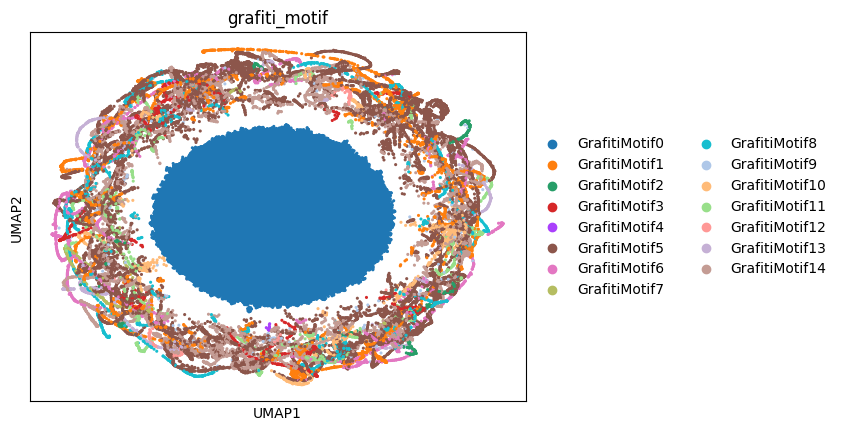

In [25]:
sc.pl.umap(adata,color=["grafiti_motif"],s=20)